In [1]:
% matplotlib inline

import scipy.io
from matplotlib.pyplot import imshow
import numpy as np

from L5.knn import KNN
from L7.face_recognition import FaceRecognition

In [2]:
training_images = scipy.io.loadmat('L7/data/ReducedImagesForTraining.mat')["images"]
testing_images = scipy.io.loadmat('L7/data/ReducedImagesForTesting.mat')["images"]

In [3]:
image = testing_images.T[0]
image_reshaped = image.reshape([60, 82]).T

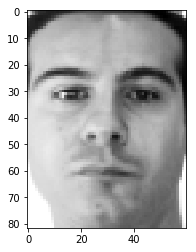

In [4]:
imshow(image_reshaped, cmap="gray")

In [5]:
# reverse_index = {}
# for image_idx, image in enumerate(training_images.T):
#     reverse_index[tuple(image)] = image_idx

In [6]:
def person_id(image_idx, images_per_person=5):
    return image_idx // images_per_person

In [7]:
training_targets = np.array(range(training_images.shape[1]))
print(training_targets)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [8]:
face_recognition = FaceRecognition()
face_recognition.fit(training_images)

In [9]:
# print(face_recognition.training_data.shape, face_recognition.testing_data.shape)
predicted_faces = face_recognition.predict(testing_images)
euclidean_distances = KNN(k=1).euclidean_distance(training_images.T, testing_images.T)

In [10]:
print(euclidean_distances.shape)

(250, 100)


In [11]:
face_recognition.print_results(testing_images)

pred. id	eucl. distance	pr. pers.	pers.	correct	test id.
157	16088807	31	0	False	0
159	27316797	31	0	False	1
120	19559562	24	1	False	2
9	32155478	1	1	True	3
157	21622901	31	2	False	4
159	41696206	31	2	False	5
120	15760144	24	3	False	6
174	21399891	34	3	False	7
190	19386876	38	4	False	8
157	15070887	31	4	False	9
27	21204523	5	5	True	10
29	33359361	5	5	True	11
157	18563914	31	6	False	12
159	28402183	31	6	False	13
61	32160041	12	7	False	14
64	38315418	12	7	False	15
90	38641601	18	8	False	16
44	57631721	8	8	True	17
147	35691353	29	9	False	18
149	33271897	29	9	False	19
145	34359384	29	10	False	20
149	62178060	29	10	False	21
160	35808960	32	11	False	22
164	54127746	32	11	False	23
157	35474340	31	12	False	24
159	35198052	31	12	False	25
120	20697545	24	13	False	26
164	23681347	32	13	False	27
162	19867019	32	14	False	28
164	18851318	32	14	False	29
90	21229798	18	15	False	30
94	32820544	18	15	False	31
157	22671673	31	16	False	32
159	39616744	31	16	False	33
120	27591781	24	17	False	34
9	33972860	

In [12]:
training_targets_faces = np.array([5 * [i] for i in range(training_images.shape[1] // 5)]).flatten()
testing_targets_faces = np.array([2 * [i] for i in range(testing_images.shape[1] // 2)]).flatten()
print(training_targets_faces, testing_targets_faces, sep="\n")

[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4
  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9
 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14
 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19
 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29 29
 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34 34 34
 35 35 35 35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39 39 39 39
 40 40 40 40 40 41 41 41 41 41 42 42 42 42 42 43 43 43 43 43 44 44 44 44 44
 45 45 45 45 45 46 46 46 46 46 47 47 47 47 47 48 48 48 48 48 49 49 49 49 49]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11 12
 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24
 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36 37
 37 38 38 3

In [13]:
print(face_recognition.score(testing_images))

0.17
